## Situation 
#### As AIRBNB is growing in popularity, it is increasingly become the focus of regulations designed to limit the number of properties listed in each city. I analyzed Paris listings with a focus on pricing. Stakeholders want a visual summary of factors affecting price and whether regulations adopted in 2015 impacted listings in the Paris market. I used Jupyter Notebook for the case study.

#### Objective 1: Profile & QA the data
The first objective is to read in the AirBnB listings data, calculate basic profiling metrics, change column datatypes as necessary, and filter down to only Paris Listings. 


#### 1. Import/Open the Listings.csv file

In [1]:
import pandas as pd
listings = pd.read_csv(r'D:\Maven Analytics\Air BnB Listing\Airbnb Data/Listings.csv', encoding="ISO-8859-1", low_memory=False)

In [4]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


#### 2. Cast any date columns as a datetime format

In [16]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [17]:
listings["host_since"] =pd.to_datetime(listings["host_since"])
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

#### 3. Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’.

In [18]:
paris_listings = (
    listings
    .query("city=='Paris'")
    .loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
)
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


#### 4. QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [19]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

Missing values for host_since column are in such a small fraction that I will ignore this for now and lose these rows when performing time series analysis but not in a way that is going to meaningfully impact the analysis.

In [20]:
paris_listings.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


The results showed that 0 minimum value for price and accommodate. So, I count the rows where either of them was 0. 

In [21]:
paris_listings.query("accommodates==0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [22]:
paris_listings.query("price==0").count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

The results showed that only 62 rows had 0 in price and 54 rows had only 0 in accommodates field. The volume is so low, its less than 100th of the percent of the data that it is not going to impact the statistical analysis in meaningful way. So, I am going to leave it like this.

#### Objective 2: Prepare the data for visualization
The second objective is to produce DataFrames that will be used in visualizations by aggregating and manipulating the listings data in several ways.

#### 1. Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high).

In [23]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price":"mean"})
    .sort_values("price")

)
paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


The data shows that cheapest neighbourhood in Paris is Menilmontant. It has a difference of 8 euros even with second cheapest. 

In [24]:
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


The most expensive neighbourhood is Elysee which is very luxurious and touristy area. It has a big difference of 35 euros even with Louvre, the second most expensice neighbourhood in Paris.  

#### 2. Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

In [25]:
paris_listings_accommodates = (
paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price": "mean"})
    .sort_values("price")

)
paris_listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [26]:
paris_listings_accommodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


#### 3. Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts



In [27]:
paris_listings_over_time = (
paris_listings
    .set_index("host_since")
    .resample("Y")
    .agg({
        "neighbourhood":"count", 
        "price": "mean"
    })

)

In [28]:
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


#### OBJECTIVE 3: Visualize the data and summarize findings
Your final objective is to build visuals to show the number of new hosts by year, overall average price by year and neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.


#### 1. Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

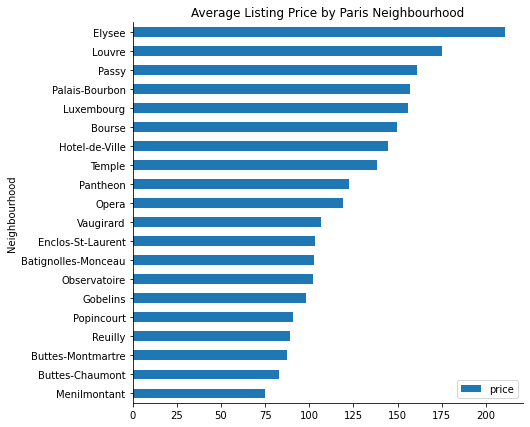

In [47]:
import seaborn as sns
(paris_listings_neighbourhood
 .plot
 .barh(
     title="Average Listing Price by Paris Neighbourhood",
     xlabel="Neighbourhood",
     ylabel="Price per Night (Euros)",
     figsize=(7,7)
     
 
 )

)
sns.despine()

The graph helped me to determine that Elysee was the most expensive neighbourhood and while Menilmontant was the most economical one. 

#### 2. Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed


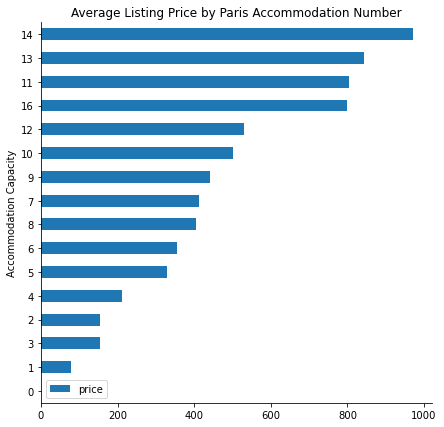

In [49]:
(paris_listings_accommodates
 .plot
 .barh(
     title="Average Listing Price by Paris Accommodation Number",
     xlabel="Accommodation Capacity",
     ylabel="Price per Night (Euros)",
     figsize=(7,7)
     
 
 )

)
sns.despine()

The graph assisted me to understand that places having an accommodation capacity for 14 were most expensive. Surprisingly accommodation for 16 was cheaper than 14, but upon investigation I came to know that only 2 data values were present for 16 accommodates in the data otherwise it would have showed the same trend. 

#### 3. Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed

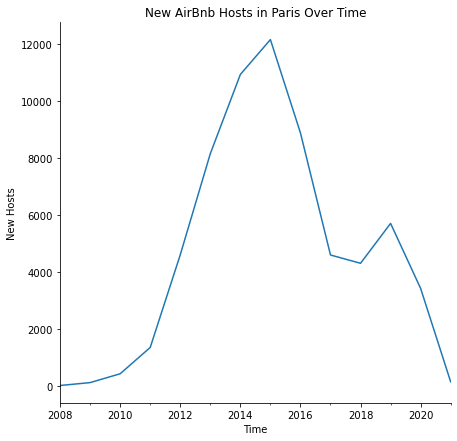

In [56]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    xlabel="Time",
    title="New AirBnb Hosts in Paris Over Time",
    figsize=(7,7)

)
sns.despine()

The graph shows that there were very few hosts when AirBnb was launched and it started to increase rapidly as AirBnb goes popular. It almost hit 12000 in 2015. Around this time regulators and government of Paris stepped in because hosuing prices were going up and communities were starting to fray. It was very profitable for house owners to rent on AirBnd rather than giving it on lease. So, city started to put some restrictions like who could list, for how long property can be listed on AirBnb etc. As a result, the number of New Hosts started to fall and kept on decreasing.

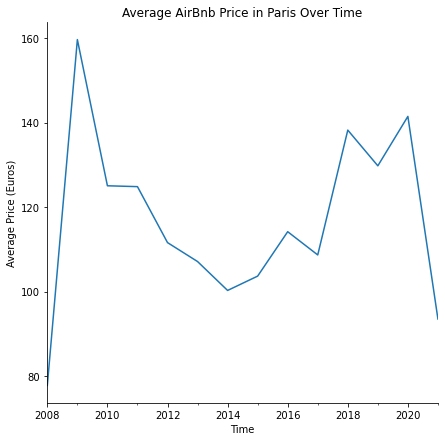

In [57]:
paris_listings_over_time["price"].plot(
    ylabel="Average Price (Euros)",
    xlabel="Time",
    title="Average AirBnb Price in Paris Over Time",
    figsize=(7,7)

)
sns.despine()

The graph showed that price hiked during initial phase maybe because of was still being established. After that the price started to drop as more hosts started to come into market and overall competition increased. But when those regulations were in place the price started to increase because customers had fewer options. After 2020, the price drastically dropped because of Covid lockdown.    

#### 4. Create a dual axis line chart to show both new hosts and average price over time 

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, Higher Prices')

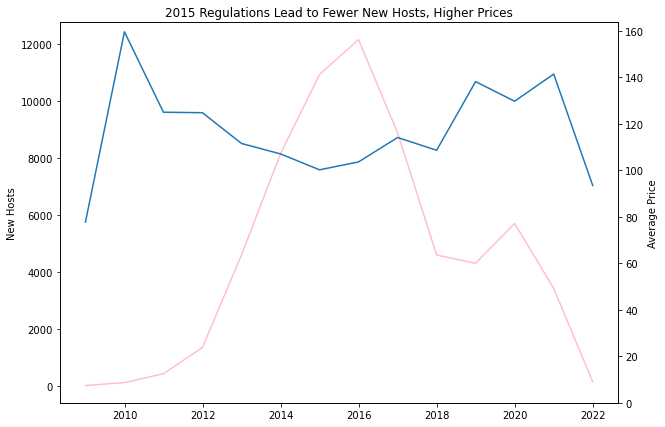

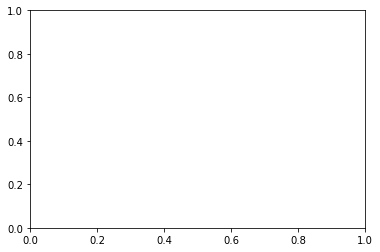

In [68]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="pink"    
)
ax.set_ylabel("New Hosts")

ax2 = ax.twinx()
fig, ax = plt.subplots()
ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price"    
)
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")
ax2.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")